<a href="https://colab.research.google.com/github/Rudh1830/Intruder-Detection-System-Using-YOLOv8-with-Gradio-Interface/blob/main/intruder_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision torchaudio opencv-python ultralytics numpy face_recognition
# Restart the runtime after installing packages
# import os
# os.kill(os.getpid(), 9)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.0 MB/s eta 0:00:00
  

In [ ]:
import cv2 # Import cv2 here
import os
from datetime import datetime

video_path = 'my_cctv.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video file.") # More informative message
else:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("End of video stream or error reading frame.") # More informative message
            break

        intruder_detected = False  # Reset for each frame
        # Ensure 'model' is defined before this line, e.g., load a YOLO model
        try:
            results = model(frame) # This requires 'model' to be defined
        except NameError:
            print("Error: 'model' is not defined. Please load a detection model.")
            break


        for result in results:
            boxes = result.boxes
            for box in boxes:
                cls_id = int(box.cls[0])
                conf = float(box.conf[0])
                label = model.names[cls_id]

                # Detect only person class with confidence > 0.5
                if label == 'person' and conf > 0.5:
                    intruder_detected = True
                    x1, y1, x2, y2 = map(int, box.xyxy[0])

                    # Draw bounding box and label on frame
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
                    cv2.putText(frame, f"{label} {conf:.2f}", (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

                    # Crop and save intruder image
                    intruder_img = frame[y1:y2, x1:x2]
                    if intruder_img is not None and intruder_img.size > 0:
                        # Ensure 'save_dir' is defined before this line
                        try:
                            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S_%f")[:-3]
                            crop_path = os.path.join(save_dir, f"intruder_crop_{timestamp}.jpg")
                            cv2.imwrite(crop_path, intruder_img)
                            print(f"[{timestamp}] Intruder detected with confidence {conf:.2f}")
                        except NameError:
                            print("Error: 'save_dir' is not defined. Please create or define a save directory.")
                            break


        if intruder_detected:
            # Ensure 'save_dir' is defined before this line
            try:
                timestamp = datetime.now().strftime("%Y%m%d_%H%M%S_%f")[:-3]
                full_path = os.path.join(save_dir, f"intruder_full_{timestamp}.jpg")
                cv2.imwrite(full_path, frame)
            except NameError:
                print("Error: 'save_dir' is not defined. Please create or define a save directory.")
                break


        # === DISPLAY LOGIC ===
        # This part might need adjustment for Colab depending on how you want to display frames
        # cv2.imshow("Intruder Detection", frame)
        # if cv2.waitKey(1) & 0xFF == ord('q'):
        #     print("Quitting detection...")
        #     break

    # Release the video capture object and close windows outside the loop
    cap.release()
    # cv2.destroyAllWindows() # This is usually needed when using cv2.imshow

print("intruder detection process finished") # More informative message

Error: 'model' is not defined. Please load a detection model.
intruder detection process finished


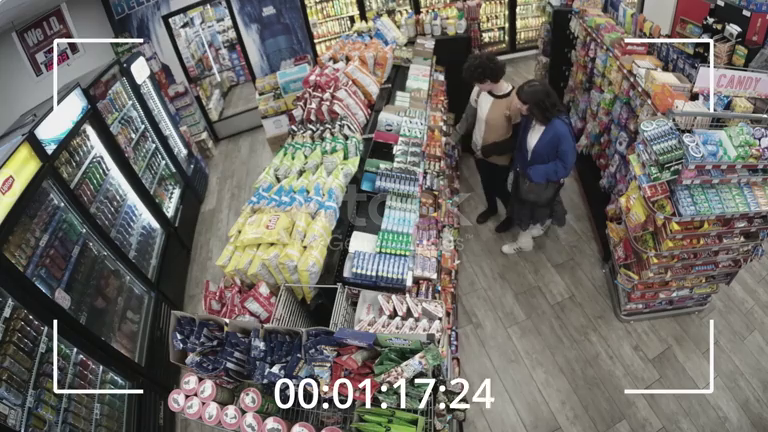

-1

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(frame)
# Use a short delay if needed
cv2.waitKey(1)


In [ ]:
          import cv2
import os
from datetime import datetime
# For Colab, only if you're running in Google Colab
# from google.colab.patches import cv2_imshow


In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model
model = YOLO('yolov8n.pt')  # You can choose a different model size like 'yolov8s.pt', 'yolov8m.pt', etc.
print("YOLO model loaded successfully.")

ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
!pip install ultralytics opencv-python deepface gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/128.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/